In [1]:
from qaoa import GM_QAOA_CVRP
from problems import cvrp_problem
from plot import plot_cvrp,plot_cvrp_solution
from qiskit.providers.fake_provider import FakePrague

import numpy as np

import heapq
from operator import itemgetter
import math

import matplotlib.pyplot as plt

In [2]:
capacity = 3
N = 5
seed = 2345

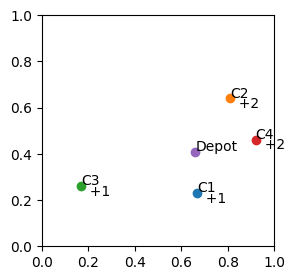

In [3]:
locs,items = cvrp_problem(size=N,capacity=capacity,num_vehicle=2,seed=seed)
plot_cvrp(locs,items)

In [4]:
q=GM_QAOA_CVRP(locs, items, capacity=capacity, backend='statevector_simulator')

33


In [5]:
q.load('./results/n5_q3_seed2345_sv.json')

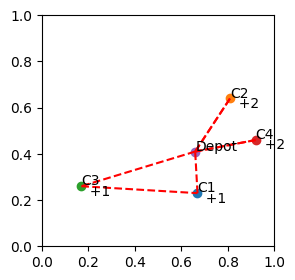

In [6]:
plot_cvrp_solution(q.get_solution(q.solution_string),locs,items)

In [7]:
feasible_counts = {}
for key in q.counts_his[-1].keys():
    if q.feasible(key):
        feasible_counts[key] = q.counts_his[-1][key]

In [8]:
topitems = heapq.nlargest((2**(N-2))*math.factorial(N-1), feasible_counts.items(), key=itemgetter(1))
topitemsasdict = dict(topitems)

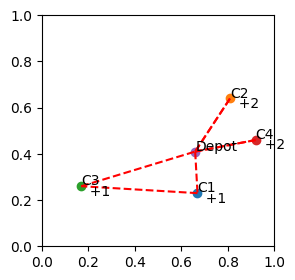

In [9]:
solution = q.get_solution(list(topitemsasdict.keys())[0])
plot_cvrp_solution(solution,locs,items)

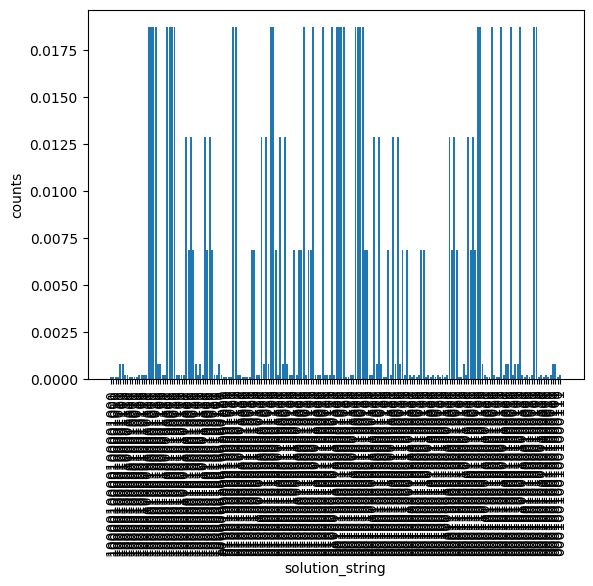

In [10]:
plt.bar(feasible_counts.keys(), feasible_counts.values());
plt.xlabel('solution_string');
plt.ylabel('counts');
plt.xticks(rotation=90);